In [1]:
!pip install pandas psycopg2

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
from sqlalchemy import create_engine as ce
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
conn=psycopg2.connect("dbname=my_duka user=postgres password=@Carol#2023")

In [3]:
df=pd.read_sql("select * from sales join products on products.id=sales.pid",conn)

In [4]:
mydf=df.set_index("pid")
mydf

,id,quantity,created_at,id,productname,buying_price,selling_price,stock_quantity
pid,,,,,,,,
1,1,5.00,2023-09-19 20:22:46.287758,1,omo,125.50,180.00,50
2,2,12.00,2023-09-19 20:23:05.892884,2,barsoap,62.00,120.00,100
3,3,50.00,2023-09-19 20:23:16.166891,3,tissues,30.00,50.00,2000
28,4,4.47,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.33,29.03,9
3,5,1.78,2023-04-03 00:38:47.000000,3,tissues,30.00,50.00,2000
...,...,...,...,...,...,...,...,...
19,1001,2.76,2022-10-21 06:06:03.000000,19,Fennel,91.08,118.40,9
26,1002,4.35,2023-08-25 15:01:12.000000,26,Neckerchief Blck,84.94,110.42,9
23,1003,3.66,2023-05-09 05:18:53.000000,23,Compound - Mocha,27.55,35.82,1


NB: Do not write queries for the questions below. Use numpy, pandas, matplotlib and searborn. The only query you should have is to join the two tables in pd.read_sql

Questions:

1.Create a new column for selling_price that is taking a 25% markup from the original buying_price column. This should be something like new_sp = buying_price*1.25. Use this new column moving forward for selling price, not the original
2.Create a new column for profit that is now using the new_sp column. Use this new profit column moving forward.
3.Display the total sales ever made in the duka.
4.Display the top 5 products of the business, in terms of sales.
5.Display the best performing month in the business in terms of sales
6.Graph the sales of each of the products ordered.
7.What is the correlation value between the buying_price and profit?
8.If possible, what is the correlation between product_name and profit?
9.Graph the monthly sales.
10.Clean up the unused columns like the old selling price and profit, then dump a csv file of the clean dataset. Ensure the output is called duka_sales_cleaned.csv

Once this is done, you push on your Github repository. You are allowed to discuss.

In [5]:
mydf['new_sp'] = mydf['buying_price'] * 1.25
mydf

,id,quantity,created_at,id,productname,buying_price,selling_price,stock_quantity,new_sp
pid,,,,,,,,,
1,1,5.00,2023-09-19 20:22:46.287758,1,omo,125.50,180.00,50,156.8750
2,2,12.00,2023-09-19 20:23:05.892884,2,barsoap,62.00,120.00,100,77.5000
3,3,50.00,2023-09-19 20:23:16.166891,3,tissues,30.00,50.00,2000,37.5000
28,4,4.47,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.33,29.03,9,27.9125
3,5,1.78,2023-04-03 00:38:47.000000,3,tissues,30.00,50.00,2000,37.5000
...,...,...,...,...,...,...,...,...,...
19,1001,2.76,2022-10-21 06:06:03.000000,19,Fennel,91.08,118.40,9,113.8500
26,1002,4.35,2023-08-25 15:01:12.000000,26,Neckerchief Blck,84.94,110.42,9,106.1750
23,1003,3.66,2023-05-09 05:18:53.000000,23,Compound - Mocha,27.55,35.82,1,34.4375


In [6]:
#already deleted the selling_price column using mydf=mydf.drop('selling_price', axis=1)
mydf=mydf.drop('selling_price', axis=1)

In [7]:
mydf['profit']=(mydf['new_sp']- mydf['buying_price'])*mydf['quantity']
mydf

,id,quantity,created_at,id,productname,buying_price,stock_quantity,new_sp,profit
pid,,,,,,,,,
1,1,5.00,2023-09-19 20:22:46.287758,1,omo,125.50,50,156.8750,156.875000
2,2,12.00,2023-09-19 20:23:05.892884,2,barsoap,62.00,100,77.5000,186.000000
3,3,50.00,2023-09-19 20:23:16.166891,3,tissues,30.00,2000,37.5000,375.000000
28,4,4.47,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.33,9,27.9125,24.953775
3,5,1.78,2023-04-03 00:38:47.000000,3,tissues,30.00,2000,37.5000,13.350000
...,...,...,...,...,...,...,...,...,...
19,1001,2.76,2022-10-21 06:06:03.000000,19,Fennel,91.08,9,113.8500,62.845200
26,1002,4.35,2023-08-25 15:01:12.000000,26,Neckerchief Blck,84.94,9,106.1750,92.372250
23,1003,3.66,2023-05-09 05:18:53.000000,23,Compound - Mocha,27.55,1,34.4375,25.208250


In [8]:
mydf=mydf.round(0)
mydf

,id,quantity,created_at,id,productname,buying_price,stock_quantity,new_sp,profit
pid,,,,,,,,,
1,1,5.0,2023-09-19 20:22:46.287758,1,omo,126.0,50,157.0,157.0
2,2,12.0,2023-09-19 20:23:05.892884,2,barsoap,62.0,100,78.0,186.0
3,3,50.0,2023-09-19 20:23:16.166891,3,tissues,30.0,2000,38.0,375.0
28,4,4.0,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.0,9,28.0,25.0
3,5,2.0,2023-04-03 00:38:47.000000,3,tissues,30.0,2000,38.0,13.0
...,...,...,...,...,...,...,...,...,...
19,1001,3.0,2022-10-21 06:06:03.000000,19,Fennel,91.0,9,114.0,63.0
26,1002,4.0,2023-08-25 15:01:12.000000,26,Neckerchief Blck,85.0,9,106.0,92.0
23,1003,4.0,2023-05-09 05:18:53.000000,23,Compound - Mocha,28.0,1,34.0,25.0


In [9]:
#display total sales ever made
total_sales=sum(mydf['new_sp']*mydf['quantity'])
total_sales

256080.0

In [10]:
#display top 5 products of the business
mydf_grouped= mydf.groupby(mydf['productname'])['quantity'].sum()
mydf_grouped.sort_values(ascending= False)
mydf_grouped.head()

productname
Cabbage - Green         83.0
Cake - Pancake         117.0
Cardamon Ground        104.0
Cheese - Sheep Milk    126.0
Compound - Mocha       127.0
Name: quantity, dtype: float64

In [11]:
# Display the best performing month in the business in terms of sales
#group by using date
best_month = mydf.groupby(mydf['created_at'].dt.to_period('M'))['quantity'].sum()
best_month= best_month.sort_values(ascending=False)
best_month.head(1)

created_at
2022-10    280.0
Freq: M, Name: quantity, dtype: float64

In [12]:
# # Convert the 'created_at' column to a datetime format
# mydf['created_at'] = pd.to_datetime(mydf['created_at'])

# # Calculate the sales for each row 
# mydf['Sales'] =( mydf['new_sp'] - mydf['buying_price'])*mydf['quantity']

# # Extract the month from the 'created_at' column and add it to the original DataFrame
# mydf['Month'] = mydf['created_at'].dt.to_period('M')


# # Find the month with the highest total sales
# best_month = mydf.groupby('Month')['Sales'].sum().idxmax()

# best_month

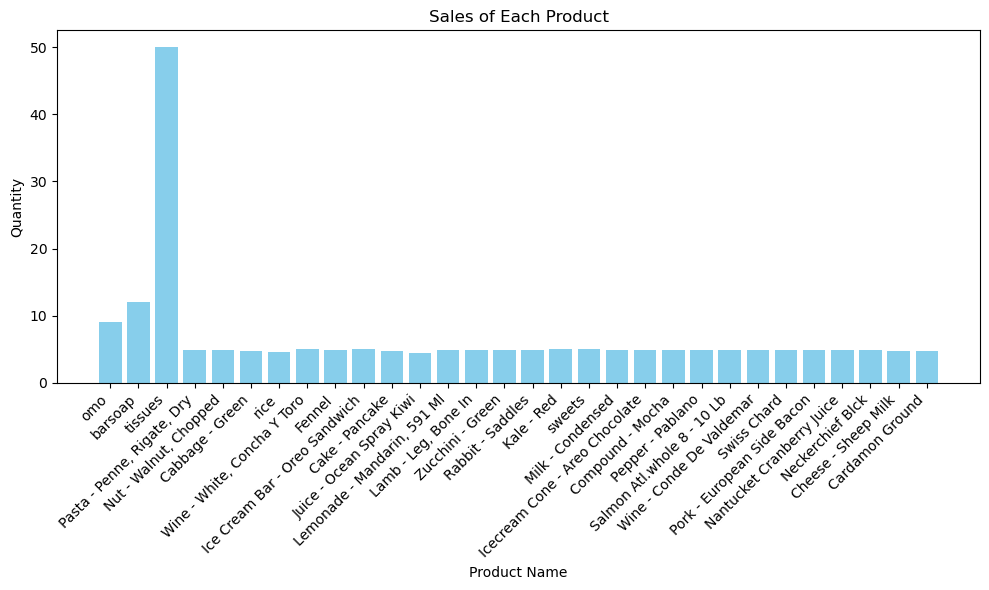

In [13]:
#Graph the sales of each of the products ordered
mydf1= mydf.groupby(mydf['productname'])['quantity'].sum()
plt.figure(figsize=(10, 6))
plt.bar(df['productname'], df['quantity'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.title('Sales of Each Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [14]:
#there is a positive correlation between buying_price and profit

In [15]:
#Graph the monthly sales
mydf['sales'] =( mydf['new_sp'] - mydf['buying_price'])*mydf['quantity']

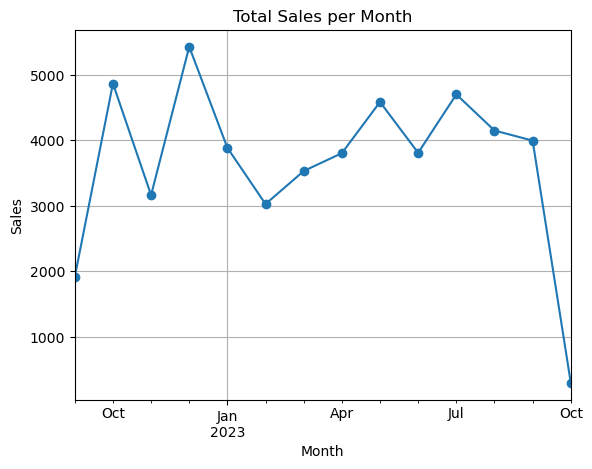

In [16]:
# Group by the month extracted from the 'Date' column and sum the 'Sales' within each group
grouped_df = mydf.groupby(mydf['created_at'].dt.to_period('M'))['sales'].sum()

# Create a line plot
grouped_df.plot(kind='line', x='Month',y='sales', marker='o') 
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales per Month')
plt.grid(True)
plt.show()

In [71]:
#Correlation between buying_price and profit
mydf['buying_price'].corr(mydf['profit'])

0.8488239783434979

In [72]:
#there is no correlation between productname and profit as it is hard to find a correlation on non-numerical values
mydf['productname'].astype('category').cat.codes.corr(mydf['profit'])

0.2946046356907391

Text(0.5, 1.0, 'Total Sales per Month')

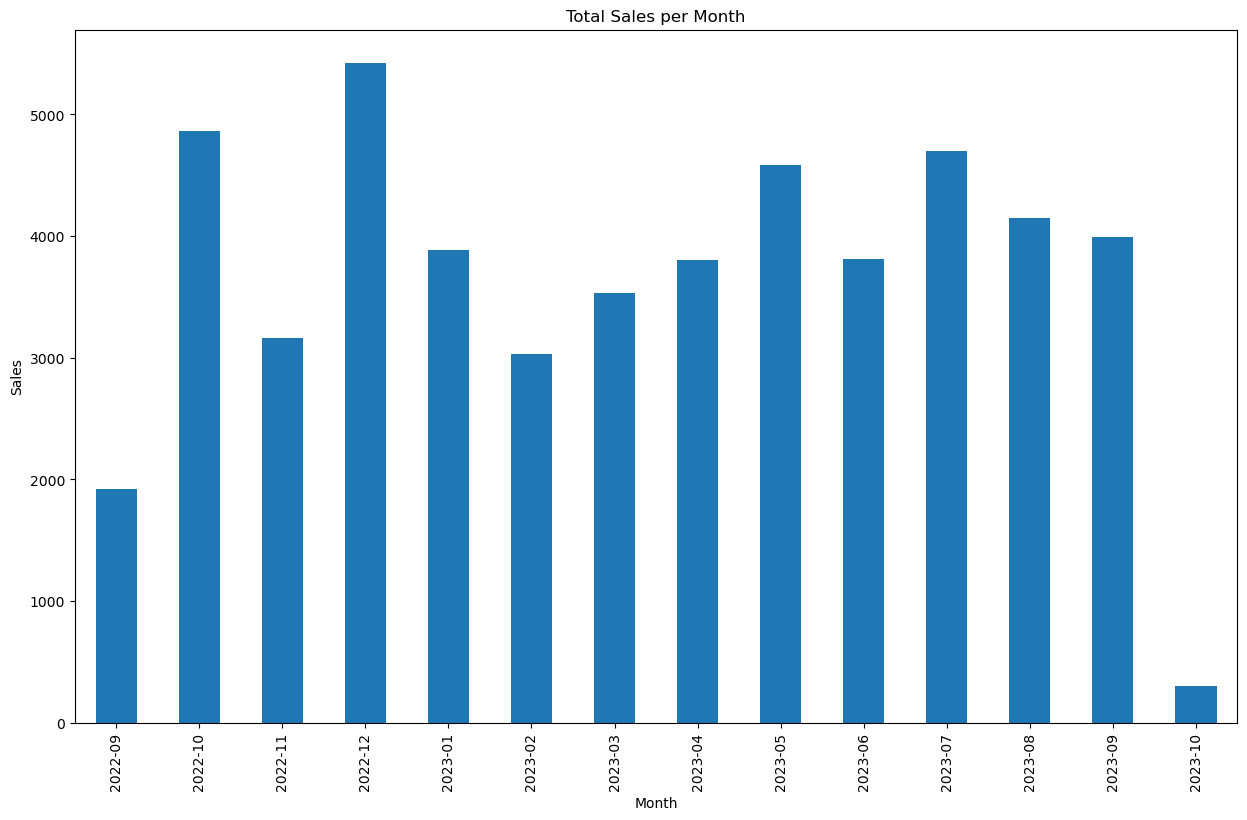

In [73]:
# Group by the month extracted from the 'Date' column and sum the 'Sales' within each group
grouped_df = mydf.groupby(mydf['created_at'].dt.to_period('M'))['Sales'].sum()

# Create a bar plot
grouped_df.plot(kind='bar', rot=90, figsize=(15,9)) 
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales per Month')

In [17]:
#cleaning the data
mydf.columns.to_list()

['id',
 'quantity',
 'created_at',
 'id',
 'productname',
 'buying_price',
 'stock_quantity',
 'new_sp',
 'profit',
 'sales']

In [18]:
mydf.isnull().sum()

id                0
quantity          0
created_at        0
id                0
productname       0
buying_price      0
stock_quantity    0
new_sp            0
profit            0
sales             0
dtype: int64

In [19]:
#csv file
mydf.to_csv('new_my_duka_cleaned.csv', index=False)

In [20]:
import plotly.express as px
import numpy as np
import seaborn as sns

In [21]:
def find_non_rare_labels():
    tolerance = 10
    temp = mydf.count()/len(mydf)
    print(temp)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    return non_rare

In [78]:
find_non_rare_labels()

id                1.0
quantity          1.0
created_at        1.0
id                1.0
productname       1.0
buying_price      1.0
stock_quantity    1.0
new_sp            1.0
profit            1.0
Sales             1.0
sales             1.0
dtype: float64


[]

In [22]:
# y = x1 +x2 +x3
# new_sp +qty +pid(total_number)

# y = x1 + x2 + x3
# profit = final_df['new_sp'] + final_df'quantity' + pid(categorical)  
# (target)

In [23]:
#Train-test Splitting
#X_train, X_test, y_train, y_test =  train_test_split(data.drop('SalePrice', axis=1), 
#data['SalePrice'], test_size=0.2, random_state=42)

In [24]:
mydf.head()

,id,quantity,created_at,id,productname,buying_price,stock_quantity,new_sp,profit,sales
pid,,,,,,,,,,
1,1,5.0,2023-09-19 20:22:46.287758,1,omo,126.0,50,157.0,157.0,155.0
2,2,12.0,2023-09-19 20:23:05.892884,2,barsoap,62.0,100,78.0,186.0,192.0
3,3,50.0,2023-09-19 20:23:16.166891,3,tissues,30.0,2000,38.0,375.0,400.0
28,4,4.0,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.0,9,28.0,25.0,24.0
3,5,2.0,2023-04-03 00:38:47.000000,3,tissues,30.0,2000,38.0,13.0,16.0


In [82]:
#mydf=mydf.drop('Sales', axis=1)

In [25]:
#rename new_sp
column_names = {'new_sp': 'selling_price'}
mydf.rename(columns=column_names, inplace=True)

In [26]:
mydf.head()

,id,quantity,created_at,id,productname,buying_price,stock_quantity,selling_price,profit,sales
pid,,,,,,,,,,
1,1,5.0,2023-09-19 20:22:46.287758,1,omo,126.0,50,157.0,157.0,155.0
2,2,12.0,2023-09-19 20:23:05.892884,2,barsoap,62.0,100,78.0,186.0,192.0
3,3,50.0,2023-09-19 20:23:16.166891,3,tissues,30.0,2000,38.0,375.0,400.0
28,4,4.0,2023-07-13 17:41:00.000000,28,"Pasta - Penne, Rigate, Dry",22.0,9,28.0,25.0,24.0
3,5,2.0,2023-04-03 00:38:47.000000,3,tissues,30.0,2000,38.0,13.0,16.0


In [27]:
#Machine Learning
x = mydf[['selling_price', 'quantity']]
y = mydf['profit']
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

In [28]:
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions using the testing set
y_test_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

In [90]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 546.364, test: 1094.851
R^2 train: 0.854, test: 0.682


In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

R^2 :  0.6818413997499809
MAE : 11.943021522379478
RMSE: 33.08853841146682


In [34]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
run_experiment(model)

R^2 :  -9.639967013255535e+19
MAE : 316298658003.3605
RMSE: 575961592934.1709
